# Вычислительная математика
## 2.2 Минимизация функции. Нелинейная регрессия

Содержание семинара:

- __Локальная минимизация по одной переменной__
    - Дихотомия
    - Метод чисел Фиббоначи (золотого сечения)
        - _Пример minimize_scalar_
- __Локальная минимизация по нескольким переменным__
    - Градиентный спуск
    - Наискорейший спуск
    - Сопряженные градиенты
        - _Примеры_
- __Нелинейная регрессия__
   - Градиентный спуск
   - Метод нормального уравнения 
        - _Пример нелинейной регрессии окружности с помощью minimize_
        - _Пример Curve fitting на scipy_
- __Домашнее задание__

## Локальная минимизация по одной переменной

<div style="display: flex;">
  <div style="flex: 3;">
.
     
Цель семинара - научиться минимизировать произвольно заданную непрерывную функцию.
      
Начнём с локальных методов от одной переменной - наиболее показательный раздел. 
      
Данная задача также называется __задачей оптимизации__. Понятно, что эта задача аналогична поиску максимума.
  </div>
  <div style="flex: 1; margin-left: 50px;">
    <img src="https://cdn.mathpix.com/snip/images/zaOXwNJRD2Xv0A2Bvl2i6j2WDFe5RoZ2RUHBdXTGmfk.original.fullsize.png" width="250"
       alt="image.png">
  </div>
</div>

### Дихотомия

Пусть имеем не слишком осциллирующую непрерывную функцию $f:[a, b] \rightarrow \mathbb{R}$. Алгоритм дихотомии выглядит следующим образом:

>0. Возьмём $[a, b]$ за начальную локализацию минимума. Фиксируем малый $\varepsilon > 0$.
> </br>
> </br>
>1. Пусть текущая локализация минимума - отрезок $[a_n, b_n]$. Берём точку $c_n = \frac{a_n + b_n}{2}$ и смотрим, в какую сторону от неё функция уменьшается. Иными словами, считаем $f_\text{left} = f(c_n - \varepsilon)$ и $f_\text{right} = f(c_n + \varepsilon)$. 
> </br>
> </br>
>2. Если $f_\text{left} < f_\text{right}$, то локальный минимум слева и $[a_{n+1}, b_{n+1}] = [a_n, c_n]$. Иначе, локальный минимум справа и $[a_{n+1}, b_{n+1}] = [c_n, b_n]$.
> </br>
> </br>
>3. Если длина $[a_{n+1}, b_{n+1}]$ меньше $\varepsilon$, останавливаемся и выдаём среднюю точку. Иначе, на шаг 1.

Метод прост и красив, но требует много вычислений функции (что может быть очень дорого). Так же для метода не нужна дифференциируемость $f$ и ошибка уменьшается экспонциально от количества шагов:

$$r \sim 2^{-n}$$

### Метод чисел Фиббоначи (золотого сечения)

Если операция вычисления непрерывной функции $f:[a, b] \rightarrow \mathbb{R}$ является __очень дорогой__ по времени, разумно использовать следующий алгоритм __чисел Фиббоначи__, использующий вызовы функции с предыдущих итераций. В нём мы заранее фиксируем $N$ - количество вызовов функции $f$.

В алгоритме используются $F_n$ - стандартные числа Фиббоначи $(1, 1, 2, 3, 5, ...)$.

>1. Задаются начальные границы отрезка $a, b$ и число итераций $N$. Счётчик $n = N$.
>    - Рассчитывают начальные точки деления: $x_1=a+(b-a) \frac{F_{n-2}}{F_n}, \quad x_2=a+(b-a) \frac{F_{n-1}}{F_n}$ 
>    - И значения в них целевой функции: $f_1=f\left(x_1\right), f_2=f\left(x_2\right)$.
></br>
></br>
>2. Уменьшаем счётчик $n = N - 1$
>    - Если $f_1>f_2$, то сужаем отрезок слева $a=x_1, \; x_1=x_2$. И модифицированный шаг 1: $x_2=b-\left(x_1-a\right), \; f_1=f_2, \; f_2=f\left(x_2\right)$.
>    -Иначе, сужаем отрезок справа $b=x_2, \; x_2=x_1$. Модифицированный шаг 1: $x_1=a+\left(b-x_2\right), \; f_2=f_1, \; >f_1=f\left(x_1\right)$.
></br>
></br>
>3. Если $n=1$, то останавливаемся и выдаём $\frac{x_1 + x_2}{2}$.
>    - Иначе, на шаг 2.


Ошибку в вычислении минимума от числа итераций $N$ можно оценить как

$$
\varepsilon_N \approx \cfrac{(\sqrt{5}-1) / 2)^N(b-a)}{2}
$$

Несложно обобщить данный метод на произвольной число итераций с учётом $\Phi=\lim _{n \rightarrow \infty} \frac{F_{n+1}}{F_n}$ (это соответствует $N = \infty$ в алгоритме). В таком случае критерием остановки будет $x_2 - x_1 < \varepsilon$. Такой метод называется __методом золотого сечения__.

На практике рекомендуется использовать реализованный кем-то другим __алгоритм Брента__ - он использует параболическую интерполяцию (аппроксимацию по трём точкам) для ускорения сходимости метода золотого сечения.

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar # За нас всё уже реализовали :)

def f(x):
    return np.cos(x)

res = minimize_scalar(f) # По умолчанию использует метод Брента

print(res)

res.x, res.fun, res.nit # Сошёлся за 8 итераций!

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: 3.1415926536439596
     nit: 8
    nfev: 12


(3.1415926536439596, -1.0, 8)

## Локальная минимизация по нескольким переменным

Поднимаем ставки. Пусть теперь $f:\mathbb{R}^m \rightarrow \mathbb{R}$ - __дифференциируемая функция нескольких переменных__. Также хотим найти локальный минимум.

В основе всего и вся будет лежать градиент (хотя есть и неградиентные методы, см. _симплекс-метод_).

### Градиентный спуск

Начнём с самого простого и очевидного - обычный градиентный спуск.

Его алгоритм уже описывался, но мы любезно напомним. В общем случае, он выглядит вот так:

>1. Задают начальное приближение и точность расчёта $\vec{x}_{0}, \varepsilon$
></br>
></br>
>2. Рассчитывают $\vec{x}_{n+1}=\vec{x}_n-\alpha \cdot \nabla f\left(\vec{x}_n\right)$, где $\alpha$ - __шаг градиентного спуска__ или __learning rate__ .
></br>
></br>
>3. Проверяют условия остановки:
>    - Если $\left|\vec{x}_{n+1}-\vec{x}_n\right|>\varepsilon,\;\; \left|f\left(\vec{x}_{n+1}\right)-f\left(\vec{x}_n\right)\right|>\varepsilon$ или $\left\|\nabla f\left(\vec{x}_{n+1}\right)\right\|>\varepsilon$ (выбирают одно из условий), то $n=n+1$ и переход к шагу 2.
>    - Иначе $\vec{x}=\vec{x}_n$ и остановка.
></br>

Про него уже много было сказано, так что погнали сразу модифицировать.

### Наискорейший спуск

Самая очевидная модификация - сделать шаг градиентного спуска зависимым от текущей точки $\alpha \rightarrow \alpha_n$, чтобы "не топтаться на месте". С другой стороны, слишком далеко тоже шагнуть не хочется.

Это наводит нас на мысль, что $\alpha_n$ можно выбирать из условия минимизации функции __одной переменной (sic!)__:

$$
\alpha_n \stackrel{\text { def }}{=} \underset{\alpha}{\operatorname{argmin}} \; \varphi(\alpha)=\underset{\alpha}{\operatorname{argmin}} \; f\left(\vec{x}_n-\alpha \cdot \nabla f\left(\vec{x}_n\right)\right)
$$

Эту самую минимизацию под одной переменной можно проводить методами из раздела выше, которые, как правило, сходятся очень быстро.

Итого, алгоритм __метода наискорейшего спуска__:

>1. Задают начальное приближение и точность расчёта $\vec{x}_{0}, \varepsilon$
></br>
></br>
>2. Рассчитывают $\vec{x}_{n+1}=\vec{x}_n-\alpha_n \cdot \nabla f\left(\vec{x}_n\right)$, где $\alpha_n$ считают из однопараметрической минимизации:
></br>
></br>
>$$
\alpha_n \stackrel{\text { def }}{=}\underset{\alpha}{\operatorname{argmin}} \; f\left(\vec{x}_n-\alpha \cdot \nabla f\left(\vec{x}_n\right)\right)
$$
></br>
>3. Проверяют условия остановки:
>    - Если $\left|\vec{x}_{n+1}-\vec{x}_n\right|>\varepsilon,\;\; \left|f\left(\vec{x}_{n+1}\right)-f\left(\vec{x}_n\right)\right|>\varepsilon$ или $\left\|\nabla f\left(\vec{x}_{n+1}\right)\right\|>\varepsilon$ (выбирают одно из условий), то $n=n+1$ и переход к шагу 2.
>    - Иначе $\vec{x}=\vec{x}_n$ и остановка.
></br>

Работает стабильнее и быстрее обычного град. спуска. Но есть методы и покруче.

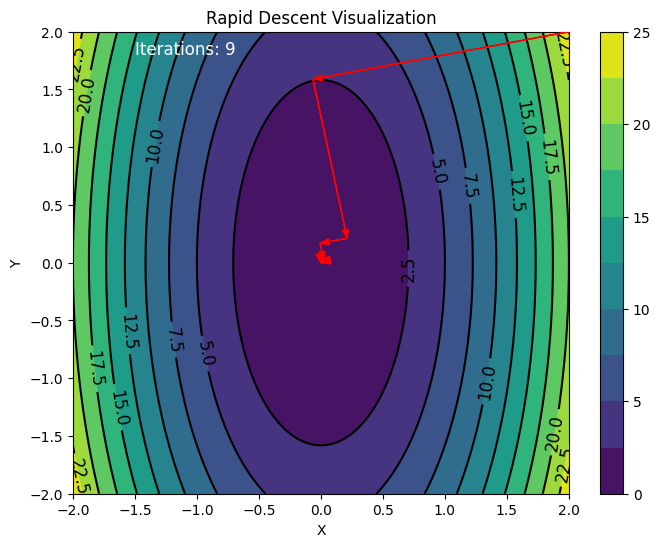

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f(x):
    return 5*x[0]**2 + x[1]**2  # Пример функции (квадратичная)

def grad_f(x):
    return np.array([10*x[0], 2*x[1]])  # Градиент функции

def rapid_descent(starting_point, epsilon):
    x = starting_point
    iterations = 0
    steps = [x]  # Список для хранения шагов алгоритма

    while True:
        phi = lambda a : f(x - a * grad_f(x))
        alpha = minimize_scalar(phi).x
        x_new = x - alpha * grad_f(x)
        iterations += 1
        steps.append(x_new)

        if np.linalg.norm(x_new - x) < epsilon:
            x = x_new
            break

        x = x_new

    return x, iterations, np.array(steps)

# Генерация сетки для построения линий уровня
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = 5*X**2 + Y**2

# Вызов функции градиентного спуска
starting_point = np.array([2, 2])
epsilon = 0.001
min_point, iterations, steps = rapid_descent(starting_point, epsilon)

# Построение графика
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=10, cmap='viridis')
plt.colorbar()

# Построение линий уровня
contour = plt.contour(X, Y, Z, levels=10, colors='black')

# Подписи к линиям уровня
plt.clabel(contour, colors='k', fmt='%2.1f', fontsize=12)

# Построение шагов алгоритма
for i in range(len(steps)-1):
    plt.arrow(steps[i][0], steps[i][1], steps[i+1][0] - steps[i][0], steps[i+1][1] - steps[i][1], 
              shape='full', lw=1, color='red', length_includes_head=True, head_width=0.05, zorder=4)

# Подпись с количеством итераций
plt.text(-1.5, 1.8, f'Iterations: {iterations}', color='white', fontsize=12)

# Настройка осей и отображение
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rapid Descent Visualization')
plt.show()


### Сопряженные градиенты

Наискорейший спуск работает хорошо, но можно ещё лучше. В наискорейшем спуске между соседними итерациями мы двигались в ортогональных направлениях - так получалось из минимизации функции вдоль текущего градиента. Но почему стоит двигаться именно ортогонально? 

Если мы находимся в окрестности локального минимума, то вся функция приближается некоторой положительно определенной квадратичной формой, которую можно сопаставить с симметричной матрицей $Г$. Оказывается, можно ориентироваться на ортогональность градиентов именно в терминах этой матрицы (т.н. __сопряженность__):

$$
\vec{x}^\top Г \vec{y}
$$

Алгоритм, использующий этот подход называется __методом наискорейшего спуска__. Как правило, работает гораздо лучше наискорейшего. Собсна, алгоритм:

>1. Пусть $\vec{x}_0$ - начальная точка, $\vec{r}_0=-\nabla f(\vec{x}_0$ - __антиградиент__.
    - Положим $\vec{S}_0=\vec{r}_0$ и найдём минимум вдоль направления $\vec{S}_0$. Обозначим точку минимума $\vec{x}_1$.
></br>
></br>
>2. Пусть на некотором шаге мы находимся в точке $\vec{x}_k$, и $\vec{r}_k$ - направление антиградиента. Положим $\vec{S}_k=\vec{r}_k+\beta_k \vec{S}_{k-1}$, где $\beta_k$ выбирают 
>    - либо $\frac{\left(\vec{r}_k, \vec{r}_k\right)}{\left(\vec{r}_{k-1}, \vec{r}_{k-1}\right)}$ (стандартный алгоритм - __Флетчера-Ривса__), 
>    - либо $\max \left(0, \frac{\left(\vec{r}_k, \vec{r}_k-\vec{r}_{k-1}\right)}{\left(\vec{r}_{k-1}, \vec{r}_{k-1}\right)}\right)$ (алгоритм __Полака-Рибьера__, иногда циклится). 
>
>    После чего найдём минимум в направлении $\overrightarrow{S_k}$ и обозначим точку минимума $\vec{x}_{k+1}$.
></br>
></br>
>3. Если в вычисленном направлении выполнилось условие остановки, то нужно забыть предыдущее направление, положив $\beta_k=0$ и повторив шаг 2. Если оно выполнилось второй раз подряд, то остановка алгоритма.
></br>

Как правило, работает во много раз лучше метода наискорейшего спуска, но __необходимо хорошее начальное приближение__.

__Примечание.__ Вообще, есть много вариантов выбора сопряженных градиентов. Вот некоторые из них:

$$
\begin{aligned}
\beta_k^{H S} &=\frac{\left\langle r_{k}, r_k - r_{k-1}\right\rangle}{\left\langle S_k, r_k - r_{k-1}\right\rangle} & \text { Хестенс, Штифель } & \text { (1952 г.) } \\
\beta_k^{F R} &=\frac{\left|r_{k}\right|^2}{\left|r_{k-1}\right|^2} & \text { Флетчер, Ривз } & \text { (1964 г.) } \\
\beta_k^{P R} &=\frac{\left\langle r_{k}, r_k - r_{k-1}\right\rangle}{\left|r_{k-1}\right|^2} & \text { Полак, Рибьер } &(1969 \text { г.) }\\
\beta_k^{C D} &=\frac{\left|r_{k}\right|^2}{\left\langle-S_k, r_{k-1}\right\rangle} & \text { Флетчер } & \text { (1987 г.) } \\
\beta_k^{L S}&=\frac{\left\langle r_k, r_k-r_{k-1}\right\rangle}{\left\langle-S_k, r_{k-1}\right\rangle}  & \text { Лиу, Стори (1991 г.) } \\
\beta_k^{D Y}&=\frac{\left\|r_k\right\|^2}{\left\langle S_k, r_k-r_{k-1}\right\rangle}  & \text { Дай, Юань (1999 г.) } \\
\beta_k^{H Z}&=\left\langle r_k-r_{k-1}-2 S_k \frac{\left\|r_k-r_{k-1}\right\|^2}{\left\langle S_k, r_k-r_{k-1}\right\rangle}, \frac{r_k}{\left\langle S_k, r_k-r_{k-1}\right\rangle}\right\rangle  & \text { Хагер, ЖКанг } \quad(2005 \text { г })
\end{aligned}
$$

Сошлись за 2 итерации


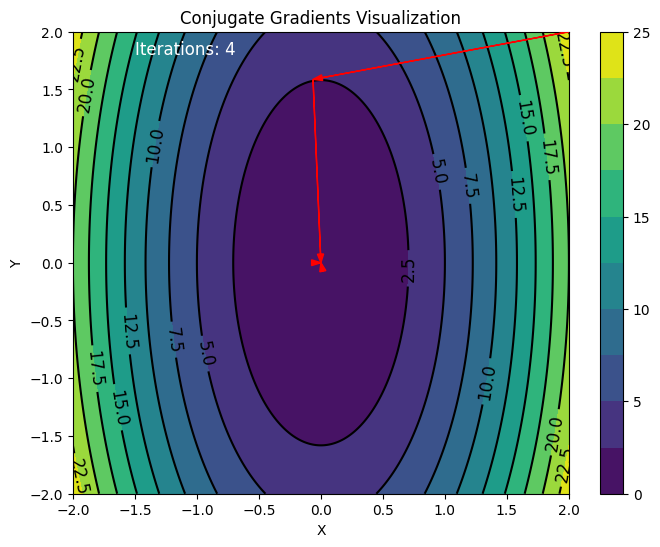

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 5*x[0]**2 + x[1]**2

def grad_f(x):
    return np.array([10*x[0], 2*x[1]])

def conjugate_gradients(starting_point, epsilon):
    x = starting_point
    iterations = 0
    steps = [x]
    
    flag = 0

    r = -grad_f(x)
    S = r

    while True:
        phi = lambda a: f(x + a * S)
        alpha = minimize_scalar(phi).x
        x_new = x + alpha * S

        r_new = -grad_f(x_new)
        
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        
        if flag:
            beta = 0

        S = r_new + beta * S

        iterations += 1
        steps.append(x_new)

        if (np.linalg.norm(x_new - x) < epsilon):
            if flag:
                x = x_new
                break
            else:
                flag = 1
                x = x_new
                r = r_new
                continue

        flag = 0
            
        x = x_new
        r = r_new

    return x, iterations, np.array(steps)

# Генерация сетки для построения линий уровня
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = 5*X**2 + Y**2

# Вызов функции градиентного спуска
starting_point = np.array([2, 2])
epsilon = 0.001
min_point, iterations, steps = conjugate_gradients(starting_point, epsilon)

# Построение графика
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=10, cmap='viridis')
plt.colorbar()

# Построение линий уровня
contour = plt.contour(X, Y, Z, levels=10, colors='black')

# Подписи к линиям уровня
plt.clabel(contour, colors='k', fmt='%2.1f', fontsize=12)

# Построение шагов алгоритма
for i in range(len(steps)-1):
    plt.arrow(steps[i][0], steps[i][1], steps[i+1][0] - steps[i][0], steps[i+1][1] - steps[i][1], 
              shape='full', lw=1, color='red', length_includes_head=True, head_width=0.05, zorder=4)

# Подпись с количеством итераций
plt.text(-1.5, 1.8, f'Iterations: {iterations}', color='white', fontsize=12)

# Настройка осей и отображение
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjugate Gradients Visualization')
print("Сошлись за 2 итерации")
plt.show()

## Нелинейная регрессия

Напомним формулировку задачу регрессии (семинар 1.3).

Пусть имеем конечный набор точек $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$, причём  $x_i \in \mathbb{R}^m, y_i \in \mathbb{R}$. Хотим найти функцию $\check{y}$, наилучшим образом аппроксимирующий данный набор точек.

"Наилучшим" в плане минимизации какой-либо функции ошибки (Loss). Самой простой и широко-используемой является средний квадрат отклонений (MSE)

$$
MSE = \mathcal{L}\left(\check{y}_i, y_i\right)=\frac{1}{N} \sum_{i=1}^N\left(\check{y}_i-y_i\right)^2
$$

В отличие от предыдущих семинаров, сейчас рассмотрим задачу нелинейной регрессии.

Пусть ищем наилучшую функцию среди некоторого класса функций $\check{y} = f(w, x)$ - где зависимость от вектора весов $w=(w_1, w_2, ..., w_m)$  в общем случае __нелинейна__.

Алгоритм не меняется. Пытаемся минимизировать MSE по весам $w_k$:

$$
MSE = \mathcal{L}=\frac{1}{N} \sum\limits_{i = 1}^{N}\left(f(w, x_i) - y_i\right)^2=\frac{1}{N}\sum_{i=1}^N r_i^2 \rightarrow min
$$

где введено обозначение для __невязки__ на каждой точке из выборки $r_i = y_i - f(w, x_i)$. Как обычно, невязка это "то что хотим" минус "что имеем".

Это выражение можно минимизировать итеративно с помощью __любого локального минимизатора выше__ (или его стохастической версии). Вот, например, обычный градиентный спуск:

>$$
w^{(n+1)}_k=w^{(n)}_k-\alpha \cdot  \left.\frac{\partial \mathcal{L}(w)}{\partial w_{k}}\right|_{w^{(n)}} =w^{(n)}_k+\frac{2\alpha}{N}\cdot\sum_{i=1}^N r_i\cdot \left. \frac{\partial f(w, x_i)}{\partial w_k} \right|_{w^{(n)}}
$$

Также можно воспользоваться итерационным __методом нормального уравнения__.

В предположении о том, что на каждом шаге мы будем менять веса несильно, разложим модельную функцию в ряд Тейлора по приращению весов на каждом шаге и на каждом $x_i$:

$$
f(w^{(n+1)},x_i) \approx f(w^{(n)},x_i)  + \sum_{k=1}^{m}  \left. \frac{\partial f(w, x_i)}{\partial w_k} \right|_{w^{(n)}} \cdot \Delta w_k^{(n+1)} = f(w^{(n)},x_i)  + \sum_{k=1}^{m}  J_{ik}^{(n)} \cdot \Delta w_k^{(n+1)}
$$

где введено обозначение $J_{ik}^{(n)}=\left. \frac{\partial f(w, x_i)}{\partial w_k} \right|_{w^{(n)}}$.

Заметим,

$$
\frac{∂r_i}{∂w_k}=\frac{∂\left( y_i - f(w, x_i)\right)}{∂w_k}=-\frac{\partial f(w, x_i)}{\partial w_k}=-J_{ik}
$$

А тогда производная Loss-а:

$$
\frac{\partial \mathcal{L}}{\partial w_k} = \frac{2}{N}\sum_{i=1}^N r_i \frac{∂r_i}{∂w_k} =\frac{2}{N}\sum_{i=1}^N \left(f(w, x_i)- y_i \right)\cdot J_{ik} = 0
$$

Далее забьём на константу перед суммой. Положим, что для итерации $w^{(n+1)}$ данное равенство выполнено (или по крайней мере выполнено приближенно) и разложим $f(w^{(n+1)},x_i)$ в ряд Тейлора:

$$
\sum_{i=1}^N \left(f(w^{(n)},x_i)  + \sum_{j=1}^{m}  J_{ij}^{(n)} \cdot \Delta w_j^{(n+1)} - y_i \right)\cdot J_{ik}^{(n)} \approx 0
$$

Перетасуем слагаемые:

$$
\sum_{i=1}^N \sum_{j=1}^{m} J_{ik}^{(n)} J_{ij}^{(n)}\Delta w_j^{(n+1)}=\sum_{i=1}^N J_{ik}^{(n)} \left(y_i - f(w^{(n)},x_i)\right)
$$

Запишем это равенство в матричном виде ($r^{(n)}$- столбец невязок для каждого объекта при $w^{(n)}$):

>$$
\left(J_{(n)}^TJ_{(n)}\right)\Delta w^{(n+1)} = J_{(n)}^T\cdot r^{(n)}
$$

Эта система линейных уравнений называется __нормальным уравнением__. Решая её, мы получаем наилучшую траекторию для поиска минимума Lossa. Заметим, что в случае линейной регрессии, сходимся к ответу за 1 итерацию.

### Пример с нелинейной регрессией окружности

Напишем функцию, которая по заданным координатам 4 точек на плоскости находит уравнение окружности (координаты центра x0, y0 и радиус R), для которой сумма квадратов расстояний от этих 4 точек до центра окружности является минимальной. Нарисуем график (отметим 4 точки, центр и нарисуем саму окружность).

In [4]:
from scipy.optimize import minimize # в данном методе реализовано много методов локальной минимизации
import numpy as np


def distance_to_circle(t, x0, y0, R, x, y):

    # x0, y0, R - параметры окружности
    # x, y - точка, до которой определяем минимальное расстояние от окружности
    # t - угол на окружности, до точки до которой определяем расстояние

    x_na_okr = R*np.cos(t) + x0
    y_na_okr = R*np.sin(t) + y0

    return ((x_na_okr - x)**2 + (y_na_okr - y)**2)**2

def minimum_distance_to_circle(x0, y0, R, x, y):

    # Определяет минимальное расстояние от точки до окружности

    dist_min = (minimize(distance_to_circle, 0, (x0, y0, R, x, y)))['fun']

    return dist_min

# Реализуем функцию ошибки

def MSE(circle, *args):

    x0 = circle[0]
    y0 = circle[1]
    R = circle[2]

    x1, y1, x2, y2, x3, y3, x4, y4 = args

    return 1./4*(minimum_distance_to_circle(x0, y0, R, x1, y1)**2
                + minimum_distance_to_circle(x0, y0, R, x2, y2)**2
                + minimum_distance_to_circle(x0, y0, R, x3, y3)**2
                + minimum_distance_to_circle(x0, y0, R, x4, y4)**2)


# Генерируем 4 случайные точки на плоскости

x1 = 10*np.random.random() - 5
y1 = 10*np.random.random() - 5

x2 = 10*np.random.random() - 5
y2 = 10*np.random.random() - 5

x3 = 10*np.random.random() - 5
y3 = 10*np.random.random() - 5

x4 = 10*np.random.random() - 5
y4 = 10*np.random.random() - 5

# Минимизируем MSE по параметрам окружности

x0_start = 0
y0_start = 0
R_start = 1

circle_start = np.array([x0_start, y0_start, R_start])

minimize(MSE, circle_start, (x1, y1, x2, y2, x3, y3, x4, y4))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.30662835401779737
        x: [-3.155e-01 -9.856e-01  4.203e+00]
      nit: 51
      jac: [-6.557e-07  1.598e-06 -4.750e-06]
 hess_inv: [[ 1.383e-01 -3.101e-02 -6.082e-02]
            [-3.101e-02  1.025e-01  2.420e-02]
            [-6.082e-02  2.420e-02  6.651e-02]]
     nfev: 216
     njev: 54

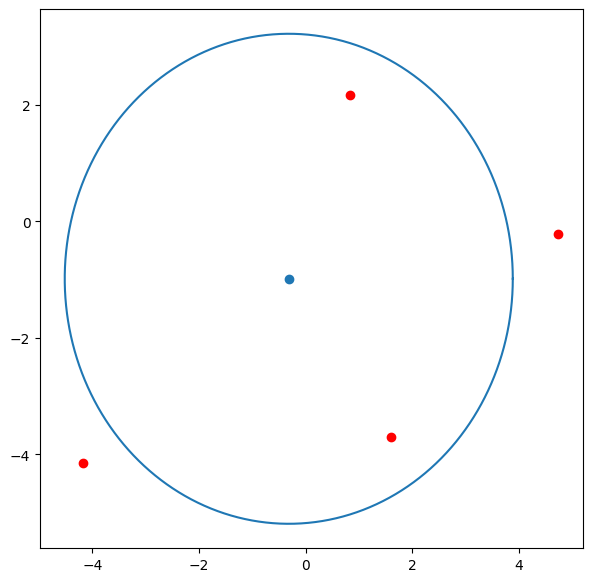

In [5]:
circle = minimize(MSE, circle_start, (x1, y1, x2, y2, x3, y3, x4, y4))['x']

x0 = circle[0]
y0 = circle[1]
R = circle[2]

import matplotlib.pyplot as plt
plt.figure(figsize = (7, 7))


ts = np.linspace(0, 2*np.pi, 200)
xs = x0 + R*np.cos(ts)
ys = y0 + R*np.sin(ts)

plt.plot(xs, ys)
plt.scatter(x0, y0)

plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='r')
plt.scatter(x3, y3, c='r')
plt.scatter(x4, y4, c='r')

### Пример регрессии нелинейной функцией на scipy

Нелинейную регрессию очень просто реализовать, используя метод `curve_fit`. Как сЛеДуЕт из названия, он __подбирает нелинейные параметры функции__ для удовлетворения близости какому-либо множеству. 

__Примечание.__ "Под капотом" он использьует различные методы __локальной__ оптимизации. Методы глобальной оптимизации можно посмотреть здесь: https://docs.scipy.org/doc/scipy/reference/optimize.html

[2.49781855 1.41012143 0.53109136]


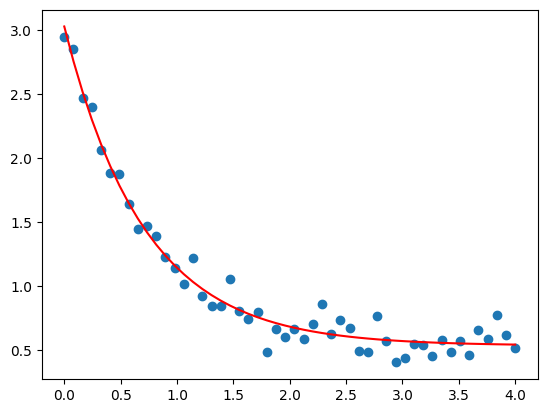

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.1 * np.random.normal(size=xdata.size)

ydata = y + y_noise
plt.scatter(xdata, ydata, label='data')

popt, pcov = curve_fit(func, xdata, ydata, p0 = [1, 1, 1])  
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

## Домашнее задание
### 1. Нелинейная регрессия

Дан набор точек. Реализуйте какой-нибудь алгоритм нелинейной регрессии для моделей из семейства функций:

$$
\check{y}=w_1 \cdot x^{w_2}+w_3 \cdot x^{w_4}
$$

Нормируйте данные, найдите наилучшие коэффициенты, удостоверьтесь, что нет переобучения.

In [1]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

### 2. Американские горки

Реализуя ручками методы дихотомии и Фиббоначи (золотого сечения), найти точку локального минимума функций (любых двух из _а-ж_ на ваш выбор):

a) $f(x)=2 x^2-\ln x$

б) $f(t)=t^3 / 3+t^2$

в) $f(t)=t^4 / 4-2 t^2$

г) $f(t)=t e^{-t^2 / 2}$

д) $f(t)=3 t^4-8 t^3+6 t^2$

e) $f(t)=(t-5) e^t$

ж) $f(t)=\left(t^2-3\right) /(t+2)$.

### 3. Функция Растригина.

$$
f\left(x_1, x_2\right)=20+x_1^2+x_2^2-10 \cos \left(2 \pi x_1\right)-10 \cos \left(2 \pi x_2\right)
$$

Постройте множество локальных минимумов и максимумов на плоскости используя `minimize`. Минимумы должны быть синими, максимумы - красными. В 3D график функции выглядит примерно так:

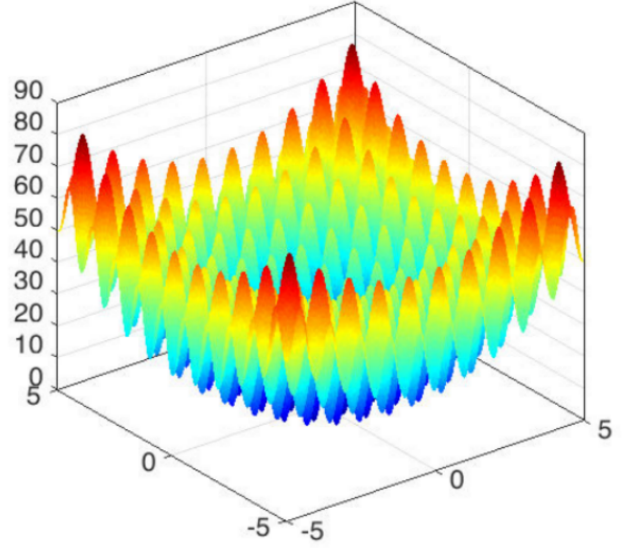

### 4. Градиенты градиентами

На этих рисунках изображены траектории движения в точку минимума методами сопряжённых градиентов и наискорейшего спуска:

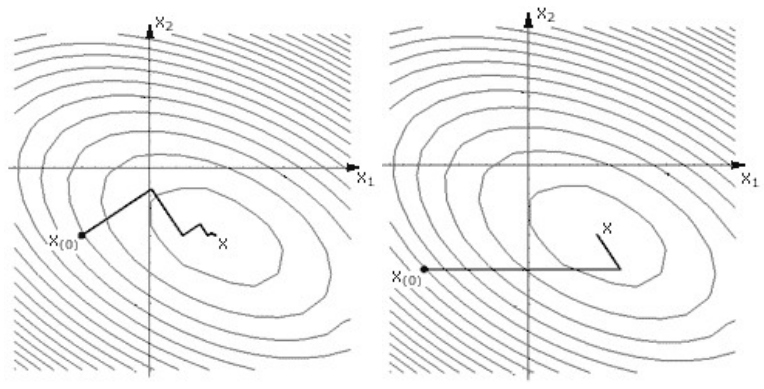

Определите, на каком из них какой из этих двух методов проиллюстрирован.  Ответ аргументируйте. Что изображают замкнутые линии? Докажите(*), что один из этих двух методов (какой?) позволяет решать квадратичные задачи за конечное число шагов. Каково максимально возможное количество этих шагов для матрицы размера n?


### 5. Овальный

Градиентный метод сходится достаточно быстро, если для минимизируемой функции f (x) поверхности уровня близки к сферам (при n = 2 – к окружностям). Если же линии уровня сильно вытянуты в каком-то направлении, то по нормали к этому направлению целевая функция меняется значительно быстрее, чем вдоль направления. Такой характер целевой функции называется овражным. Исходя из рисунка, объясните, почему в этих случаях градиентный метод сходится хуже.

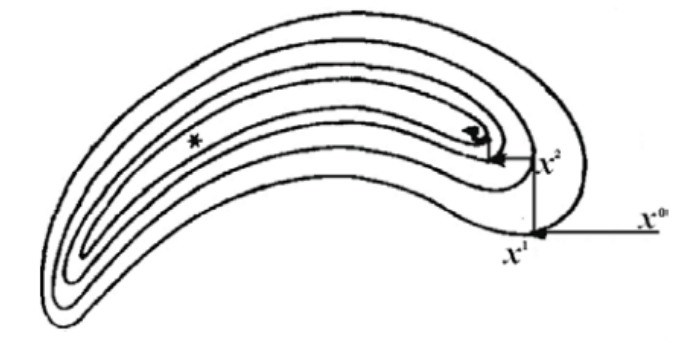

Как связан овражный характер функции с величиной наименьшего сингулярного числа матрицы квадратичной формы? А с величиной числа обусловленности матрицы?

На рисунке ниже изображена работа метода покоординатного спуска (поочередно минимизируем функцию вдоль каждой координаты однопараметрическим методом - совсем убого, поэтому не выдавали) для функций овражного характера. Какой вывод можно сделать из этого рисунка?

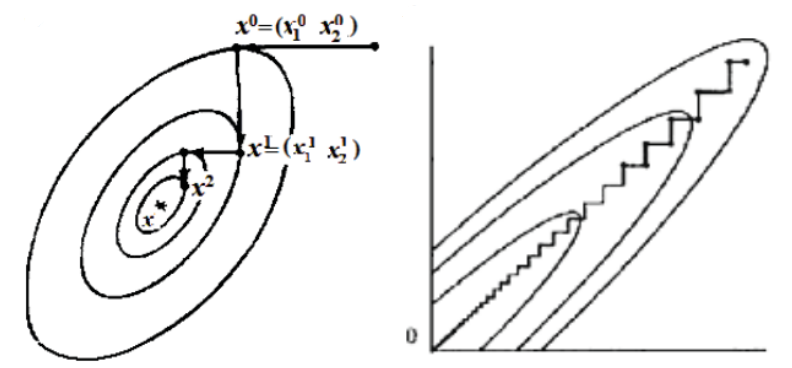 

### 6. Сопрягаемся (полузвёздочка)

Рассмотрим на примере функции Стайблински-Танга поведение различных вариантов метода сопряженных градиентов. Функция задается выражением
$$
f(x)=\frac{1}{2} \sum_{i=1}^n x_i^4-16 x_i^2+5 x_i .
$$
Глобальным минимум достигается в точке $(\eta, \ldots, \eta)$, где $\eta \approx-2.904$. Использовать данную функцию будем при $n=2$, чтобы наглядно проиллюстрировать результаты.

Напишите все 7 вариантов __(*, если не на доп. быллы, то возьмите 2 из алгоритма)__ реализации метода сопряженных градиентов из семинара. Сравните результаты. Функция специально подобрана таким образом, что некоторые из вариантов реализации ответ не смогут получить, а остальные продемонстрируют разное качество работы.

Качество измерьте как количество итераций, необходимое для получения точности

$$
\left\|r\right\|<10^{-6}
$$

Пусть метод останавливается на итерации $k$, если выполняется условие $\left\|r_k\right\|<10^{-6}$, или по истечению 1000 итераций.

Начальные приближения берите следующие: 

(0.1, -1)

(0.1, -1.1)

(0, -1)

### 7.* Сопрягаемся на максималках

Покажите экспериментально, что метод сопряженных градиентов работает во много раз лучше на случайных положительно определенных квадратичных формах. Можно использовать встроенные минимизаторы.